# Data Analysis Mathematics, Algorithms and Modeling

## Team Information - **Group Presentation 4**

**Team Members**

Name: Ayush Patel  
Student Number: 9033358

Name: Nikhil Shankar  
Student Number: 9026254

Name: Sreehari Prathap  
Student Number: 8903199


## Step 1: Install and Configure the IDE (e.g., Jupyter Notebook and VS Code)
- Install Anaconda (for Jupyter Notebook) and Visual Studio Code (VS Code).
  - Anaconda: Visit [anaconda.com](https://www.anaconda.com/products/individual) and download the appropriate installer for your operating system.
  - VS Code: Download and install from [Visual Studio Code](https://code.visualstudio.com/).
- Install Pandas Library
  - Open the terminal and run the following command: `pip install pandas`

## Step 2: Downloading the Dataset
We are using the Utrecht Fairness Recruitment dataset from [Kaggle], which can be downloaded directly via the link:
- URL: [https://www.kaggle.com/datasets/mexwell/employee-performance-and-productivity-data]

## Revised Hypothesis
The use case for this project involves clustering analysis on employee data to uncover patterns in workforce dynamics, particularly focusing on identifying factors that correlate with employee resignation. The revised hypothesis testing for the current dataset examines whether resignation is unrelated to gender. Specifically, we aim to determine if gender does not influence an employee's decision to resign, tested against the null hypothesis that gender and resignation status are independent. By analyzing clusters based on factors like performance, workload, and satisfaction scores, we hope to identify additional insights into resignation patterns without a dependency on gender alone.

## Step 3 : Data Preparation

### Data preprocessing and cleaning along with methods for EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

class EmployeeAnalysis:
    def __init__(self):
        warnings.filterwarnings('ignore')
        self.df = None
        self.df_unfiltered = None
        self.df_male = None
        self.df_female = None
        self.scaler = MinMaxScaler()

    def load_data(self, file_path):
        """Method for step 2: Load the data"""
        self.df_unfiltered = pd.read_csv(file_path)
        return len(self.df_unfiltered)

    def print_total_rows(self):
        """Method for step 3: Print total rows"""
        print("Total number of datapoints(rows)", len(self.df_unfiltered))

    def clean_data(self):
        """Method for step 4: Clean the data"""
        self.df = self.df_unfiltered.dropna(axis=0, how='any')
        print("Total number of datapoints(rows)", len(self.df))
        
        # Split data by gender
        self.df_male = self.df[self.df['Gender'] == 'Male']
        self.df_female = self.df[self.df['Gender'] == 'Female']

    def print_gender_distribution(self):
        """Method for step 5: Print gender distribution"""
        print("Number of male datapoints:", len(self.df_male))
        print("Number of female datapoints:", len(self.df_female))

    def check_null_values(self):
        """Method for step 6: Check null values"""
        nullcounts = self.df.isnull().sum()
        print(nullcounts)

    def print_shape(self):
        """Method for step 7: Print shape"""
        print(self.df.shape)

    def calculate_variance(self):
        """Method for step 8-10: Calculate variance for different groups"""
        # All data
        variance_list = self.df.select_dtypes(include=['number']).var().sort_values(ascending=True)
        print("Variance for all data:")
        print(variance_list)

        # Male data
        variance_list_male = self.df_male.select_dtypes(include=['number']).var().sort_values(ascending=True)
        print("\nVariance for male data:")
        print(variance_list_male)

        # Female data
        variance_list_female = self.df_female.select_dtypes(include=['number']).var().sort_values(ascending=True)
        print("\nVariance for female data:")
        print(variance_list_female)

    def calculate_scaled_variance(self):
        """Method for step 11: Calculate scaled variance"""
        # For all data
        numeric_df = self.df.select_dtypes(include=['number'])
        scaled_data = self.scaler.fit_transform(numeric_df)
        scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)
        variance_sorted = scaled_df.var().sort_values()
        print("Variance of each Min-Max scaled numeric column (sorted in ascending order):")
        print(variance_sorted)

        # For male data
        numeric_df_male = self.df_male.select_dtypes(include=['number'])
        scaled_data_male = self.scaler.fit_transform(numeric_df_male)
        scaled_df_male = pd.DataFrame(scaled_data_male, columns=numeric_df_male.columns)
        variance_sorted_male = scaled_df_male.var().sort_values()
        print("\nVariance of each Min-Max scaled numeric column for male data (sorted in ascending order):")
        print(variance_sorted_male)

        # For female data
        numeric_df_female = self.df_female.select_dtypes(include=['number'])
        scaled_data_female = self.scaler.fit_transform(numeric_df_female)
        scaled_df_female = pd.DataFrame(scaled_data_female, columns=numeric_df_female.columns)
        variance_sorted_female = scaled_df_female.var().sort_values()
        print("\nVariance of each Min-Max scaled numeric column for female data (sorted in ascending order):")
        print(variance_sorted_female)

    def plot_correlation_matrices(self):
        """Method for steps 12-13: Plot correlation matrices"""
        # Overall correlation matrix
        correlation_matrix = self.df.select_dtypes(include=['number']).corr()
        plt.figure(figsize=(16, 12))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True)
        plt.title("Correlation Matrix Heatmap")
        plt.show()

        # Gender-specific correlation matrices
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(32, 12))
        
        correlation_matrix_male = self.df_male.select_dtypes(include=['number']).corr()
        correlation_matrix_female = self.df_female.select_dtypes(include=['number']).corr()
        
        sns.heatmap(correlation_matrix_male, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True, ax=axes[0])
        axes[0].set_title("Correlation Matrix Heatmap for Male Data")
        
        sns.heatmap(correlation_matrix_female, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True, ax=axes[1])
        axes[1].set_title("Correlation Matrix Heatmap for Female Data")
        
        plt.show()

    def remove_salary_correlation(self):
        """Method for step 13 (continued): Remove salary correlation"""
        df_corr_removed = self.df.drop(columns=['Monthly_Salary'])
        df_corr_removed_male = self.df_male.drop(columns=['Monthly_Salary'])
        df_corr_removed_female = self.df_female.drop(columns=['Monthly_Salary'])
        
        print('correlation removed data')
        print(df_corr_removed.shape)
        print('correlation removed data male')
        print(df_corr_removed_male.shape)
        print('correlation removed data female')
        print(df_corr_removed_female.shape)

    def perform_pca(self):
        """Method for step 14: Perform PCA"""
        df_numeric = self.df.select_dtypes(include=['number']).drop(columns=['Employee_ID'], errors='ignore')
        scaled_data = self.scaler.fit_transform(df_numeric)
        
        pca = PCA()
        principal_components = pca.fit_transform(scaled_data)
        
        principal_df = pd.DataFrame(
            principal_components, 
            columns=[f'PC{i+1}' for i in range(principal_components.shape[1])]
        )
        
        print("Principal Components:")
        display(principal_df)
        
        print("\nExplained Variance Ratio:")
        print(pca.explained_variance_ratio_)

    def perform_random_forest_analysis(self):
        """Method for steps 18-20: Perform Random Forest analysis"""
        # Prepare data
        df_numeric_rft = self.df.drop(columns=['Employee_ID'])
        df_numeric_rft = df_numeric_rft.select_dtypes(include=['number'])
        X = df_numeric_rft
        y = self.df['Resigned'].astype(int)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Train model
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)

        # Plot feature importances
        feature_importances = rf.feature_importances_
        sorted_idx = feature_importances.argsort()[::-1]

        plt.figure(figsize=(10, 8))
        plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
        plt.xlabel('Feature Importance')
        plt.ylabel('Features')
        plt.title('Feature Importances from Random Forest')
        plt.gca().invert_yaxis()
        plt.xticks(rotation=90)
        plt.show()

        # Gender-specific analysis
        X_male = self.df_male.drop(columns=['Employee_ID', 'Resigned']).select_dtypes(include=['number'])
        y_male = self.df_male['Resigned'].astype(int)
        X_female = self.df_female.drop(columns=['Employee_ID', 'Resigned']).select_dtypes(include=['number'])
        y_female = self.df_female['Resigned'].astype(int)

        # Train models for each gender
        rf_male = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_male.fit(X_male, y_male)
        rf_female = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_female.fit(X_female, y_female)

        # Plot comparative feature importances
        feature_importances_male = rf_male.feature_importances_
        feature_importances_female = rf_female.feature_importances_
        sorted_idx_male = feature_importances_male.argsort()[::-1]
        sorted_feature_names = X_male.columns[sorted_idx_male]
        sorted_importances_male = feature_importances_male[sorted_idx_male]
        sorted_importances_female = feature_importances_female[sorted_idx_male]

        self.plot_gender_feature_importances(
            sorted_feature_names, 
            sorted_importances_male, 
            sorted_importances_female
        )

    def plot_gender_feature_importances(self, feature_names, male_importances, female_importances):
        """Helper method for plotting gender-specific feature importances"""
        bar_width = 0.4
        index = np.arange(len(feature_names))

        fig, ax = plt.subplots(figsize=(10, 8))
        ax.bar(index, male_importances, bar_width, label='Male', color='blue', alpha=0.7)
        ax.bar(index + bar_width, female_importances, bar_width, label='Female', color='pink', alpha=0.7)

        ax.set_xlabel('Features')
        ax.set_ylabel('Feature Importance')
        ax.set_title('Feature Importances for Males and Females')
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(feature_names, rotation=90)
        ax.legend()

        plt.tight_layout()
        plt.show()

    def perform_feature_selection(self, gender=None):
        """Method for steps 21-22: Perform feature selection"""
        if gender == 'Male':
            df_subset = self.df[self.df['Gender'] == 'Male']
        else:
            df_subset = self.df

        df_numeric_rft = df_subset.drop(columns=['Employee_ID'])
        df_numeric_rft = df_numeric_rft.select_dtypes(include=['number'])
        X = df_numeric_rft
        y = df_subset['Resigned'].astype(int)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        model = LogisticRegression(max_iter=200)
        selector = SequentialFeatureSelector(model, n_features_to_select='auto', direction="forward")
        selector.fit(X_train, y_train)

        selected_features = selector.get_support(indices=True)
        selected_feature_names = X.columns[selector.get_support()]
        print("Selected feature names:", selected_feature_names.tolist())

        X_train_selected = selector.transform(X_train)
        X_test_selected = selector.transform(X_test)
        
        model.fit(X_train_selected, y_train)
        score = model.score(X_test_selected, y_test)
        print("Score with selected features:", score)

##### Missing Values Ratio

In [3]:
# Initialize the analyzer
analyzer = EmployeeAnalysis()

# Load and process the data
analyzer.load_data("./data/Extended_Employee_Performance_and_Productivity_Data.csv")
analyzer.print_total_rows()
analyzer.clean_data()
analyzer.print_gender_distribution()

Total number of datapoints(rows) 100000
Total number of datapoints(rows) 100000
Number of male datapoints: 48031
Number of female datapoints: 48001


We understand that there are no rows with empty values. The dataset is now filtered for analysis so we can proceed to the next step. 

In [12]:
analyzer.check_null_values()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64


> There are no null values in any rows in any columns

In [13]:
analyzer.print_shape()

(100000, 20)


- There are 20 columns. Means the count of dimension is 20. 
- Its a low number.
- The number of rows (100000) is very high compare to features. (20) So this can't be considered as high dimensional dataset.

#### **Low Variance Filter**

In [4]:
# Perform various analyses
analyzer.calculate_variance()

Variance for all data:
Promotions                     6.656466e-01
Employee_Satisfaction_Score    1.324155e+00
Performance_Score              2.001449e+00
Years_At_Company               8.233090e+00
Sick_Days                      1.876268e+01
Team_Size                      3.019948e+01
Overtime_Hours                 7.506535e+01
Work_Hours_Per_Week            7.995942e+01
Age                            1.264302e+02
Projects_Handled               2.093689e+02
Training_Hours                 8.346542e+02
Remote_Work_Frequency          1.249704e+03
Monthly_Salary                 1.883780e+06
Employee_ID                    8.333417e+08
dtype: float64

Variance for male data:
Promotions                     6.651047e-01
Employee_Satisfaction_Score    1.325428e+00
Performance_Score              2.010098e+00
Years_At_Company               8.223263e+00
Sick_Days                      1.880418e+01
Team_Size                      3.034234e+01
Overtime_Hours                 7.480810e+01
Work_Hours_Pe

Before we do this step we need to scale the features.
We are using min max scaling

In [5]:

analyzer.calculate_scaled_variance()

Variance of each Min-Max scaled numeric column (sorted in ascending order):
Monthly_Salary                 0.071026
Years_At_Company               0.082331
Employee_Satisfaction_Score    0.082760
Employee_ID                    0.083336
Training_Hours                 0.085160
Projects_Handled               0.087201
Age                            0.087556
Work_Hours_Per_Week            0.088844
Overtime_Hours                 0.089257
Team_Size                      0.093208
Sick_Days                      0.095728
Remote_Work_Frequency          0.124970
Performance_Score              0.125091
Promotions                     0.166412
dtype: float64

Variance of each Min-Max scaled numeric column for male data (sorted in ascending order):
Monthly_Salary                 0.070981
Years_At_Company               0.082233
Employee_Satisfaction_Score    0.082839
Employee_ID                    0.083228
Training_Hours                 0.084732
Projects_Handled               0.087321
Age               

- Now we have the features sorted based on variance, We can see the range of variance is from 0.07-0.16 for range 0-1
- Only monthly salary has a very low variance and we can think about removing it. 
- We would keep it for furter analysis and if it is noted that its a candidate in further analysis we will choose to remove it.

#### **High Correlation Filter**

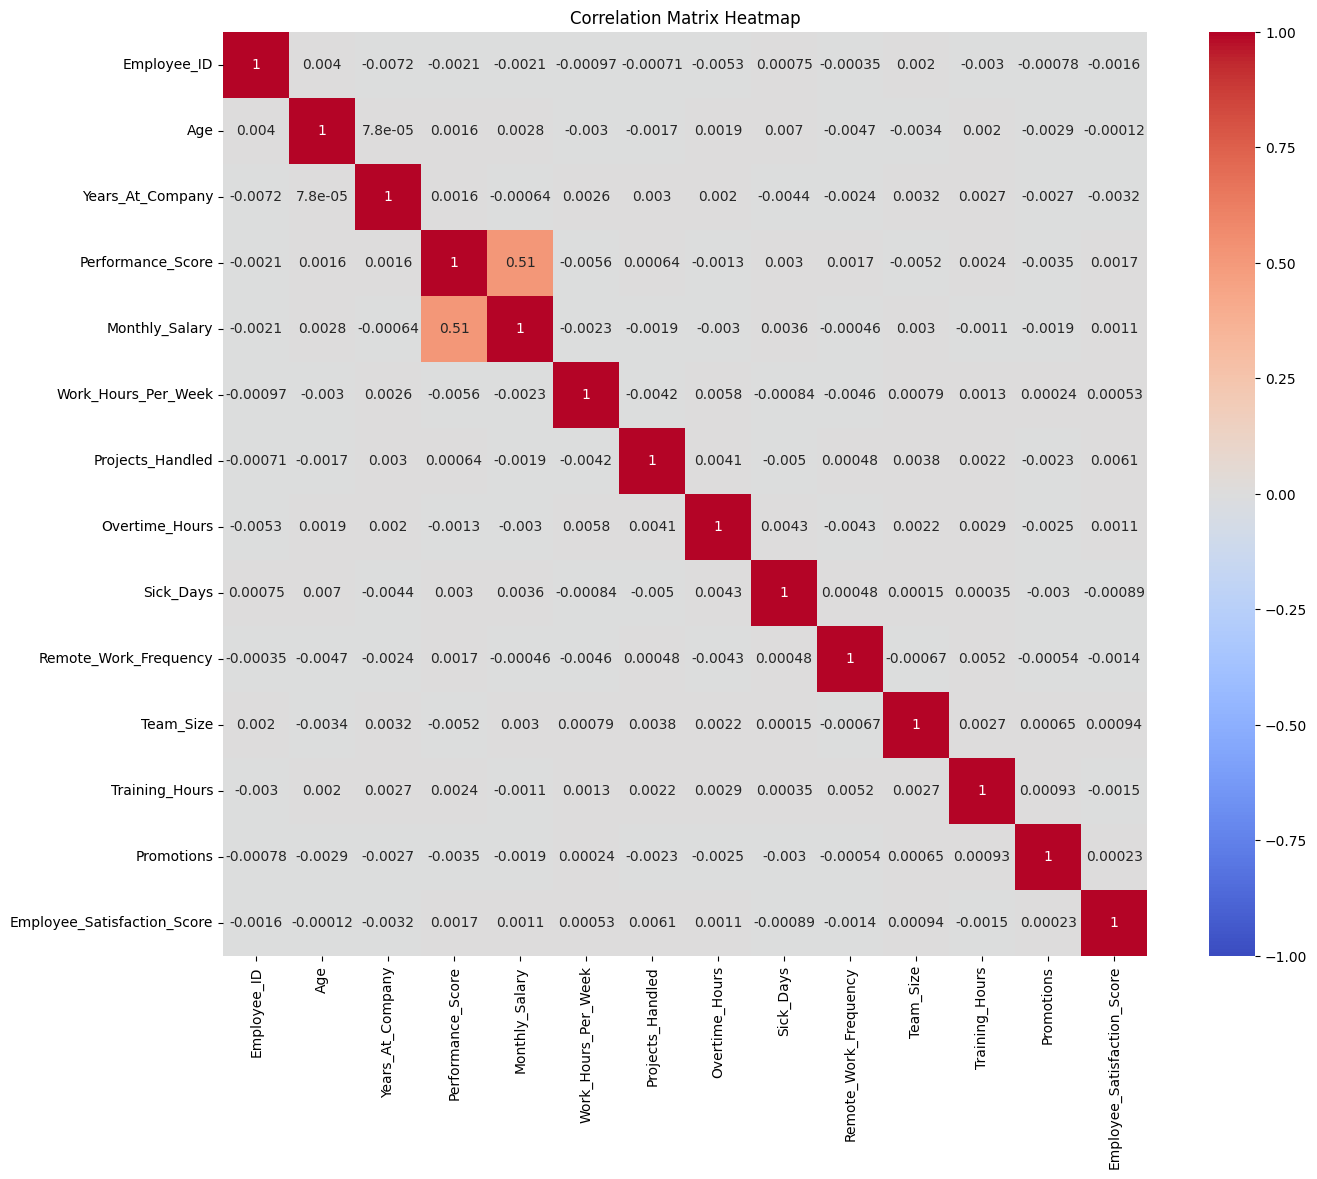

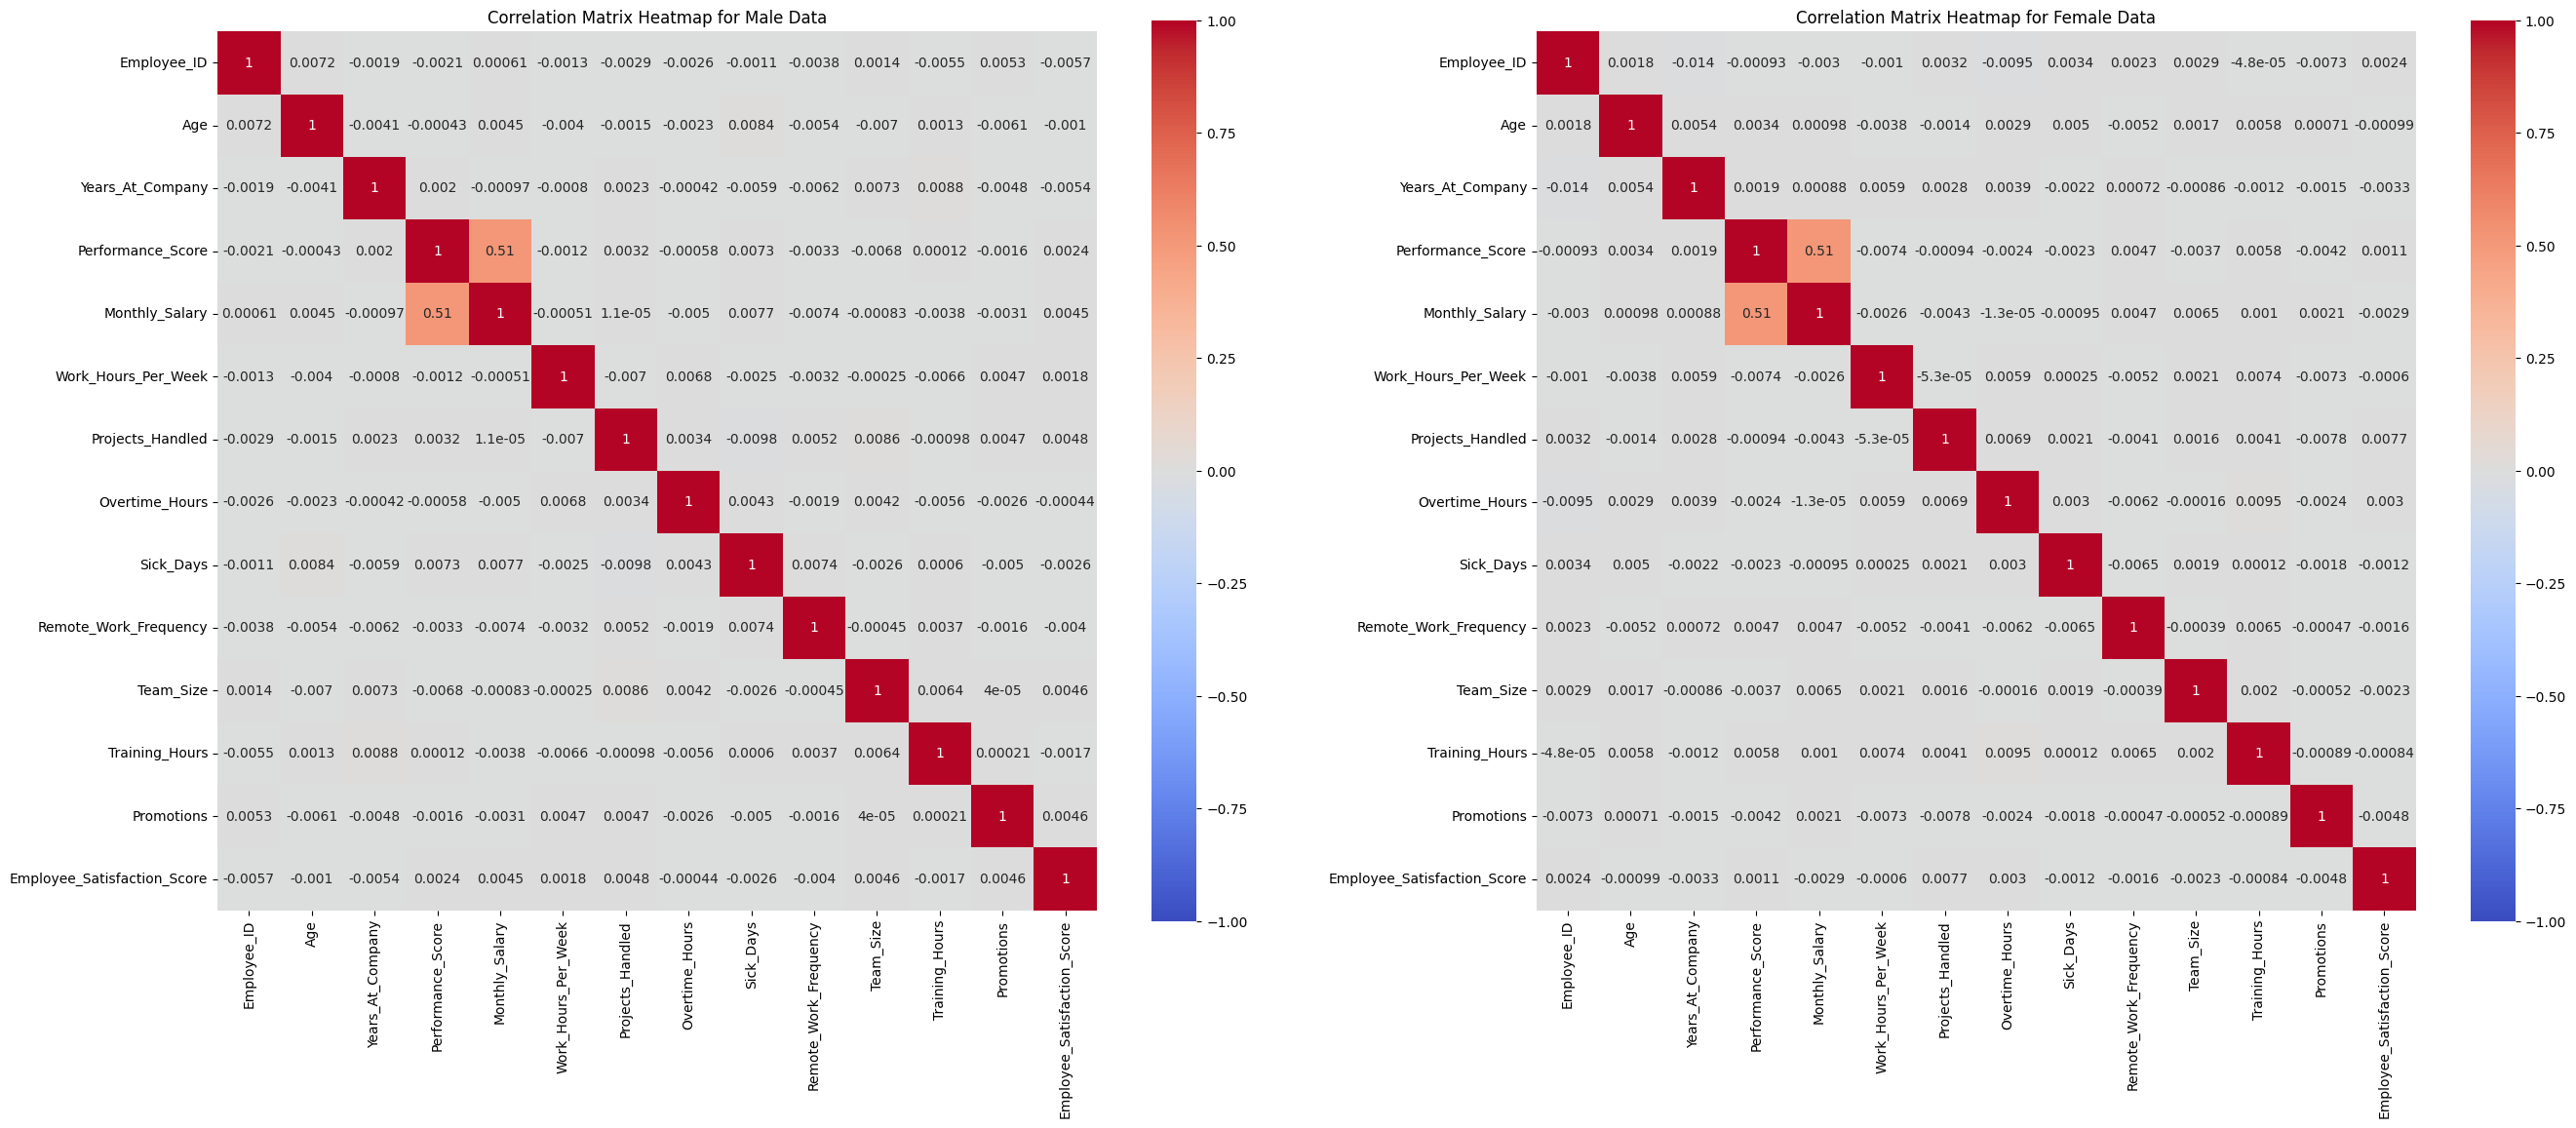

In [6]:

analyzer.plot_correlation_matrices()

- We can see that Monthly Salary and Performance is highly correlated.
- In the previous step we noted that monthly salary has low variance. Hence at this point out of the two pairs we can remove monthly salary 

#### **Principal Component Analysis**

In [7]:

analyzer.perform_pca()

Principal Components:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.517891,0.442436,-0.503505,-0.316992,0.210149,-0.005647,-0.570397,0.292150,0.058075,0.115144,0.037135,-0.294087,-0.195447
1,0.476188,0.567438,0.512127,0.473953,0.124761,-0.256477,-0.231474,-0.401977,-0.049640,0.125552,-0.094836,-0.532633,-0.069156
2,-0.498489,-0.071561,-0.007605,-0.287917,-0.050169,-0.396183,-0.146727,0.297803,0.126446,-0.470227,-0.169879,0.350412,-0.094417
3,0.009320,-0.371025,0.482798,0.404492,-0.005725,0.461865,0.043872,0.251121,-0.289260,-0.480786,-0.392417,0.137646,-0.145199
4,0.011794,-0.369768,0.496342,0.465627,0.270449,0.206396,-0.273516,-0.055259,-0.545195,-0.372534,-0.340062,-0.278113,-0.146616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.501063,0.082341,0.257396,-0.345845,0.343218,-0.088128,0.370978,-0.404932,0.345696,-0.020836,-0.258433,-0.552186,-0.382226
99996,-0.020843,0.609976,-0.494830,-0.541316,0.011046,-0.269449,-0.094507,-0.167162,0.174228,0.294169,0.051324,0.153840,0.059183
99997,0.016114,-0.365926,-0.488742,-0.121858,-0.320322,-0.462804,-0.237987,0.356804,-0.100475,0.448521,-0.190150,0.293899,-0.139167
99998,-0.024391,0.615959,0.253750,-0.507262,-0.403490,-0.223754,-0.212484,-0.624691,0.103458,-0.112937,-0.230205,0.403073,0.065695



Explained Variance Ratio:
[0.1300791  0.11973401 0.09768948 0.07489617 0.07289972 0.07002368
 0.06933733 0.06839058 0.06797698 0.06652663 0.06473426 0.06418767
 0.03352438]


- We can see that none of the columsn have high pca variance ratio.
- Pointing to the fact that there are no major features which contribute to the overall variance of the dataset.

#### **Random Forest Trees**

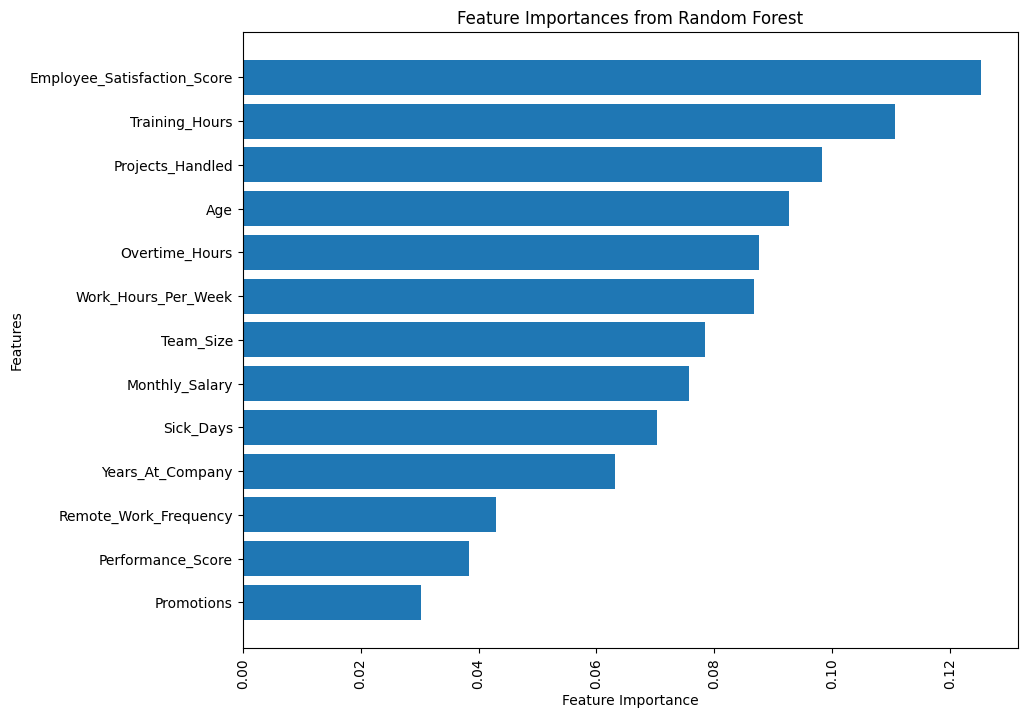

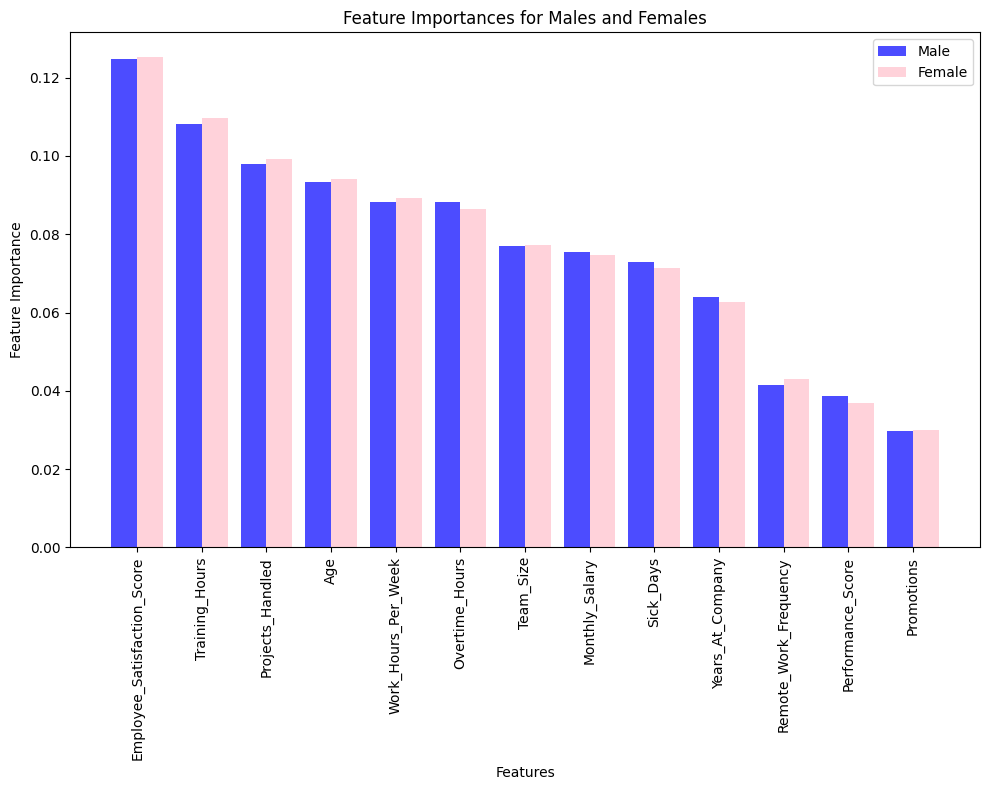

In [8]:

analyzer.perform_random_forest_analysis()

- We can see that Promotions, Performance_Score , Remote_Work_Frequency and Years_At_Company are the least impactful in predicting resignation.

#### **Forward Feature Elimination**

In [9]:
# Perform feature selection for all data
analyzer.perform_feature_selection()


Selected feature names: ['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled']
Score with selected features: 0.90145


For the whole dataset the most important features are
- Age
- Years at company
- Performance Score
- Monthly Salary
- Work Hours Per Week
- Projects Handled

Now we can run the same after splitting the dataset based on Gender and see if the same features are effecting both genders or if there is a difference

In [10]:

# Perform feature selection for male data only
analyzer.perform_feature_selection(gender='Male')

Selected feature names: ['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled']
Score with selected features: 0.900697408139898



For Male gender the most important features are
- Age
- Years at company
- Performance Score
- Monthly Salary
- Work Hours Per Week
- Projects Handled

In [11]:

# Perform feature selection for female data only
analyzer.perform_feature_selection(gender='Female')

Selected feature names: ['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled']
Score with selected features: 0.90145


For Female gender the most important features are
- Age
- Years at company
- Performance Score
- Monthly Salary
- Work Hours Per Week
- Projects Handled

### Validation for the Hypothesis

1. **Variance Analysis and Min-Max Scaling**:
   - Low Variance analysis revealed that there were no feature with highly significantly low variance, which means we cant remove any features using variance approach.

2. **Correlation Analysis**:
   - Monthly Salary and Performance score were the only 2 features with high correlation. So one of them can be removed in case we think that dimensionality is a problem.

3. **Principal Components Analysis (PCA)**:
   - From PCA the least significant PCA itself was contributing 3%. So even if we remove this least significant feature we lose out on 3% of explanation of the dataset.

4. **Feature Importance Analysis**:
   - We found the highest 6 features based on weight. If needed we can remove the others because we get 90% accuracy in prediction just by using these 6 features itself.

### Conclusion

- We found which are the major features affecting resignation. Age, Years at company,Performance Score,Monthly Salary,Work Hours Per Week,Projects Handled etc are the most signifacnt features which affect the resignation.
- After splitting the dataset based on Gender also we found that there was no difference in the significant features, meaning the same features were contributing towards resignation regardless of gender. 
- Our hypothesis was that features affecting resignation stays the same regardless of Gender which is confirmed after the analysis.
